In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import jovian
import os

warnings.warn("deprecated", DeprecationWarning)

/home/fabio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: deprecated
  if __name__ == '__main__':


Carico il file di testo contenente tutte le info su tutte le raccolte ADNI

In [137]:
ADNI = pd.read_csv('Dati_CSF/ADNIMERGE.csv')

/home/fabio/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,19,20,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
ADNI.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0.0,2020-01-09 04:20:17.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0.0,2020-01-09 04:20:17.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6.0,2020-01-09 04:20:17.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12.0,2020-01-09 04:20:17.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24.0,2020-01-09 04:20:17.0


Carico il file per le correzioni

In [139]:
df = pd.read_csv('Dati_CSF/UPENNBIOMK9_04_19_17.csv')

In [140]:
df.head()

,RID,VISCODE,VISCODE2,EXAMDATE,PHASE,BATCH,KIT,STDS,RUNDATE,ABETA,TAU,PTAU,COMMENT,update_stamp
0,3,bl,bl,2005-09-12,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
1,3,m12,m12,2006-09-13,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
2,4,bl,bl,2005-11-22,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-09,1501,153.1,13.29,NaN,2017-04-20 14:39:54.0
3,4,m12,m12,2006-11-28,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-09,1176,159.7,13.3,NaN,2017-04-20 14:39:54.0
4,5,m12,m12,2006-09-06,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-11-22,472.8,334.1,34.04,NaN,2017-04-20 14:39:54.0


Elimino le colonne che non mi interessano e tengo solo le baseline degli ADNI1. A questo punto elimino tutte le righe che non contengono i CSF

In [141]:
ADNI = ADNI[['RID', 'PTID', 'VISCODE', 'COLPROT', 'EXAMDATE', 'DX_bl','AGE',
             'PTGENDER', 'ABETA', 'TAU', 'PTAU', 'Month_bl']]
ADNI1 = ADNI.loc[(ADNI['COLPROT'] == 'ADNI1')]
ADNI1 = ADNI1.dropna(axis=0, subset=['ABETA'])

# ADNITOT è la raccolta comprendente ADNI 2 + go +3. Le baseline in questo caso si riferiscono
# solamente ai nuovi pazienti per le nuove raccolte

ADNITOT = ADNI.loc[(ADNI['COLPROT'] != 'ADNI1')]
ADNITOT = ADNITOT.dropna(axis=0, subset=['ABETA', 'TAU', 'PTAU'])

In [142]:
ADNI1.head()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,DX_bl,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
1,3,011_S_0003,bl,ADNI1,2005-09-12,AD,81.3,Male,741.5,239.7,22.83,0.0000
3,3,011_S_0003,m12,ADNI1,2006-09-12,AD,81.3,Male,601.4,251.7,24.18,11.9672
5,4,022_S_0004,bl,ADNI1,2005-11-08,LMCI,67.5,Male,1501,153.1,13.29,0.0000
7,4,022_S_0004,m12,ADNI1,2006-11-14,LMCI,67.5,Male,1176,159.7,13.3,12.1639
10,5,011_S_0005,bl,ADNI1,2005-09-07,CN,73.7,Male,547.3,337,33.43,0.0000


Raggruppo in base alle classi 'AD', 'CN', 'LMCI' e conto 

In [143]:
ADNI1.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
AD,196,196,196,196,196,196,196,196,196,196,196
CN,279,279,279,279,279,279,279,279,279,279,279
LMCI,444,444,444,444,444,444,444,444,444,444,444


In [144]:
ADNITOT.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
AD,148,148,148,148,148,148,148,148,148,148,148
CN,372,372,372,372,372,372,372,372,372,372,372
EMCI,453,453,453,453,453,453,453,453,453,453,453
LMCI,337,337,337,337,337,337,337,337,337,337,337
SMC,140,140,140,140,140,140,140,140,140,140,140


In alcuni casi, quando il valore per i CSF supera una certa soglia, non viene riportato il valore vero ma un valore indicativo (es. > 1700). Sostituisco questi intervalli con il valore riportato

In [145]:
# verifico il numero di casi in cui questo accade nella raccolta ADNI1
ADNI1_NO = ADNI1.loc[(ADNI1['ABETA']=='>1700') | (ADNI1['ABETA']=='<200') | (ADNI1['TAU']=='>1300') 
                 | (ADNI1['TAU']=='<80') | (ADNI1['PTAU']=='>120') | (ADNI1['PTAU']=='<8')]

In [146]:
ADNI1_NO.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
AD,6,6,6,6,6,6,6,6,6,6,6
CN,51,51,51,51,51,51,51,51,51,51,51
LMCI,26,26,26,26,26,26,26,26,26,26,26


I dati in cui i CSF non sono indicati nel dettaglio nella raccolta ADNI1 sono il 4% per il caso AD, il 21% per il caso CN e il 9% per il caso LMCI


In [147]:
# verifico il numero di casi in cui questo accade nella raccolta completa ADNI2 +3 +GO
ADNITOT_NO = ADNITOT.loc[(ADNITOT['ABETA']=='>1700') | (ADNITOT['ABETA']=='<200') | (ADNITOT['TAU']=='>1300') 
                 | (ADNITOT['TAU']=='<80') | (ADNITOT['PTAU']=='>120') | (ADNITOT['PTAU']=='<8')]

In [148]:
# sistemo! Posso però farlo solamente per il >1700. vedo quanto migliora
for index, row in ADNI1.iterrows():
    if row['ABETA']=='>1700':
        x = (df.loc[(df.RID==row['RID']) & (df.VISCODE2 == row['VISCODE'])]['COMMENT'].str.split(' ').values[0][-2])
        ADNI1.at[index, 'ABETA'] = x
        
for index, row in ADNITOT.iterrows():
    if row['ABETA']=='>1700':
        x = (df.loc[(df.RID==row['RID']) & (df.VISCODE2 == row['VISCODE'])]['COMMENT'].str.split(' ').values[0][-2])
        ADNITOT.at[index, 'ABETA'] = x

Verifico quanto è migliorata la situazione

In [149]:
ADNI1_NO = ADNI1.loc[(ADNI1['ABETA']=='>1700') | (ADNI1['ABETA']=='<200') | (ADNI1['TAU']=='>1300') 
                 | (ADNI1['TAU']=='<80') | (ADNI1['PTAU']=='>120') | (ADNI1['PTAU']=='<8')]
ADNITOT_NO = ADNITOT.loc[(ADNITOT['ABETA']=='>1700') | (ADNITOT['ABETA']=='<200') | (ADNITOT['TAU']=='>1300') 
                 | (ADNITOT['TAU']=='<80') | (ADNITOT['PTAU']=='>120') | (ADNITOT['PTAU']=='<8')]

In [150]:
ADNI1_NO.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
AD,2,2,2,2,2,2,2,2,2,2,2
CN,7,7,7,7,7,7,7,7,7,7,7
LMCI,1,1,1,1,1,1,1,1,1,1,1


In [151]:
ADNITOT_NO.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
CN,2,2,2,2,2,2,2,2,2,2,2
LMCI,1,1,1,1,1,1,1,1,1,1,1


Molto meglio! questi casi rimanenti li elimino direttamente

In [152]:
ADNI1 = pd.concat([ADNI1, ADNI1_NO]).drop_duplicates(keep=False)
ADNITOT = pd.concat([ADNITOT, ADNITOT_NO]).drop_duplicates(keep=False)

In [153]:
ADNI1.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
AD,194,194,194,194,194,194,194,194,194,194,194
CN,272,272,272,272,272,272,272,272,272,272,272
LMCI,443,443,443,443,443,443,443,443,443,443,443


In [168]:
ADNITOT.groupby('DX_bl').count()

,RID,PTID,VISCODE,COLPROT,EXAMDATE,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl
DX_bl,,,,,,,,,,,
AD,148,148,148,148,148,148,148,148,148,148,148
CN,370,370,370,370,370,370,370,370,370,370,370
EMCI,453,453,453,453,453,453,453,453,453,453,453
LMCI,336,336,336,336,336,336,336,336,336,336,336
SMC,140,140,140,140,140,140,140,140,140,140,140


In [154]:
# Verifico che non ci siano più casi simili
ADNI1.loc[(ADNI1['ABETA']=='>1700') | (ADNI1['ABETA']=='<200') | (ADNI1['TAU']=='>1300') 
                 | (ADNI1['TAU']=='<80') | (ADNI1['PTAU']=='>120') | (ADNI1['PTAU']=='<8')]

,RID,PTID,VISCODE,COLPROT,EXAMDATE,DX_bl,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl


In [155]:
ADNITOT.loc[(ADNITOT['ABETA']=='>1700') | (ADNITOT['ABETA']=='<200') | (ADNITOT['TAU']=='>1300') 
                 | (ADNITOT['TAU']=='<80') | (ADNITOT['PTAU']=='>120') | (ADNITOT['PTAU']=='<8')]

,RID,PTID,VISCODE,COLPROT,EXAMDATE,DX_bl,AGE,PTGENDER,ABETA,TAU,PTAU,Month_bl


In [156]:
try:
    os.makedirs('Output')
except Exception as e:
    print(e)

[Errno 17] File exists: 'Output'


In [157]:
ADNI1.to_csv('Output/ADNI1.csv')
ADNITOT.to_csv('Output/ADNITOT.csv')

Grafico per ABeta42

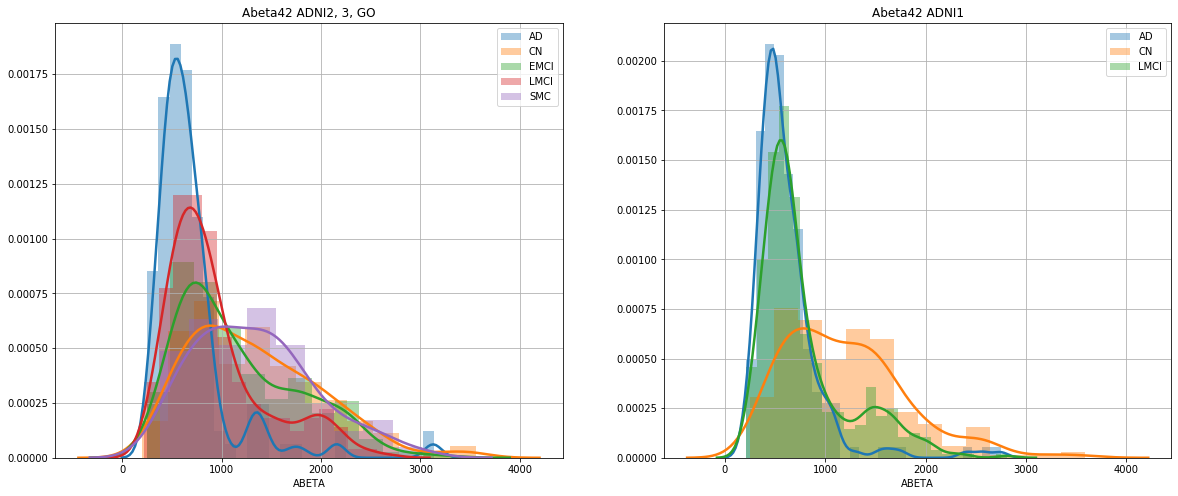

In [172]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.title('Abeta42 ADNI2, 3, GO')
plt.grid()
for i, dati in ADNITOT.groupby('DX_bl'):
    sns.distplot(dati['ABETA'].astype(float), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

plt.subplot(122)
plt.title('Abeta42 ADNI1')
plt.grid()
for i, dati in ADNI1.groupby('DX_bl'):
    sns.distplot(dati['ABETA'].astype(float), label=str(i),kde_kws={"lw": 2.5})
plt.legend()

Grafico per Tau

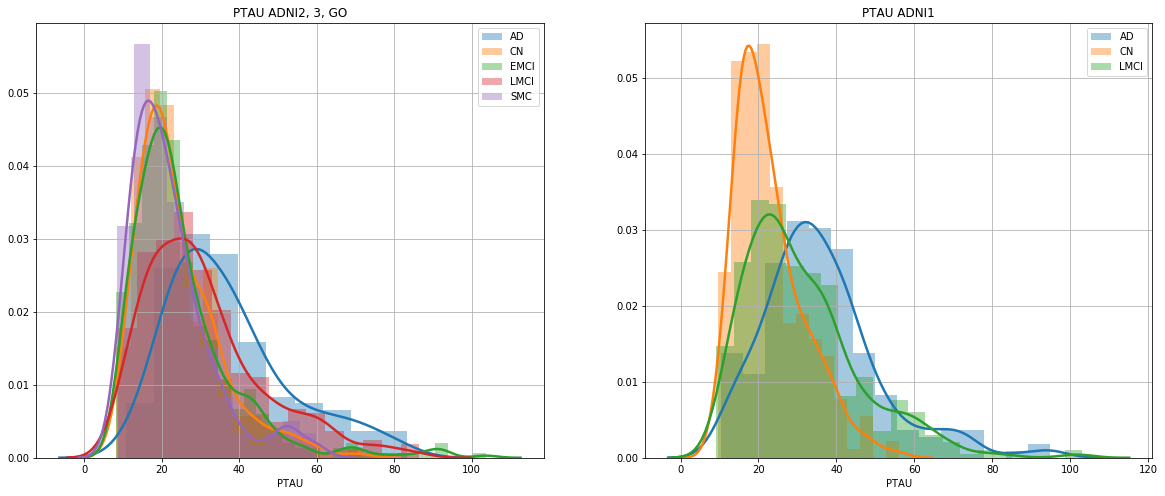

In [159]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.grid()
plt.title('PTAU ADNI2, 3, GO')

for i, dati in ADNITOT.groupby('DX_bl'):
    sns.distplot(dati['PTAU'].astype(float), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

plt.subplot(122)

plt.grid()
plt.title('PTAU ADNI1')
for i, dati in ADNI1.groupby('DX_bl'):
    sns.distplot(dati['PTAU'].astype(float), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

Grafico per tau fosforilata

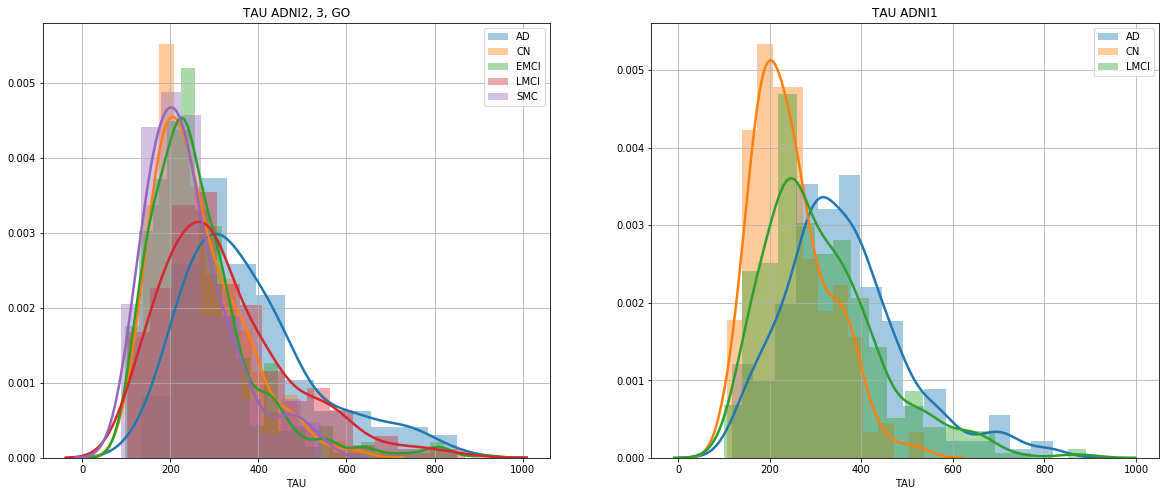

In [160]:
plt.figure(figsize=(20,8))

plt.subplot(121)

plt.title('TAU ADNI2, 3, GO')
plt.grid()
for i, dati in ADNITOT.groupby('DX_bl'):
    sns.distplot(dati['TAU'].astype(float), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

plt.subplot(122)
plt.title('TAU ADNI1')
plt.grid()
for i, dati in ADNI1.groupby('DX_bl'):
    sns.distplot(dati['TAU'].astype(float), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

Provo grafici di rapporti: 
log(PTAU/ABETA)

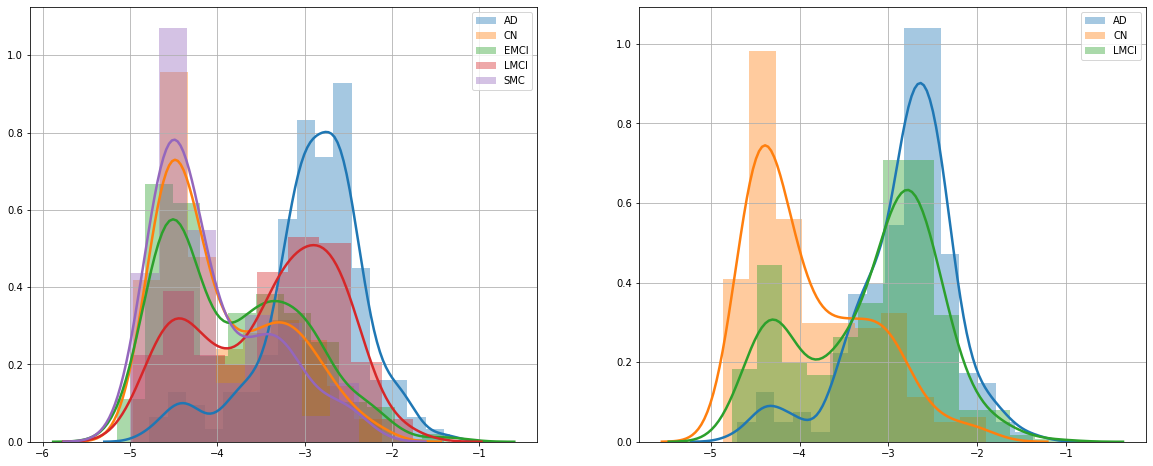

In [173]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.grid()

for i, dati in ADNITOT.groupby('DX_bl'):
    sns.distplot(np.log(dati['PTAU'].astype(float)/(dati['ABETA'].astype(float))), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

plt.subplot(122)

plt.grid()
for i, dati in ADNI1.groupby('DX_bl'):
    sns.distplot(np.log(dati['PTAU'].astype(float)/(dati['ABETA'].astype(float))), label=str(i), kde_kws={"lw": 2.5})
plt.legend()

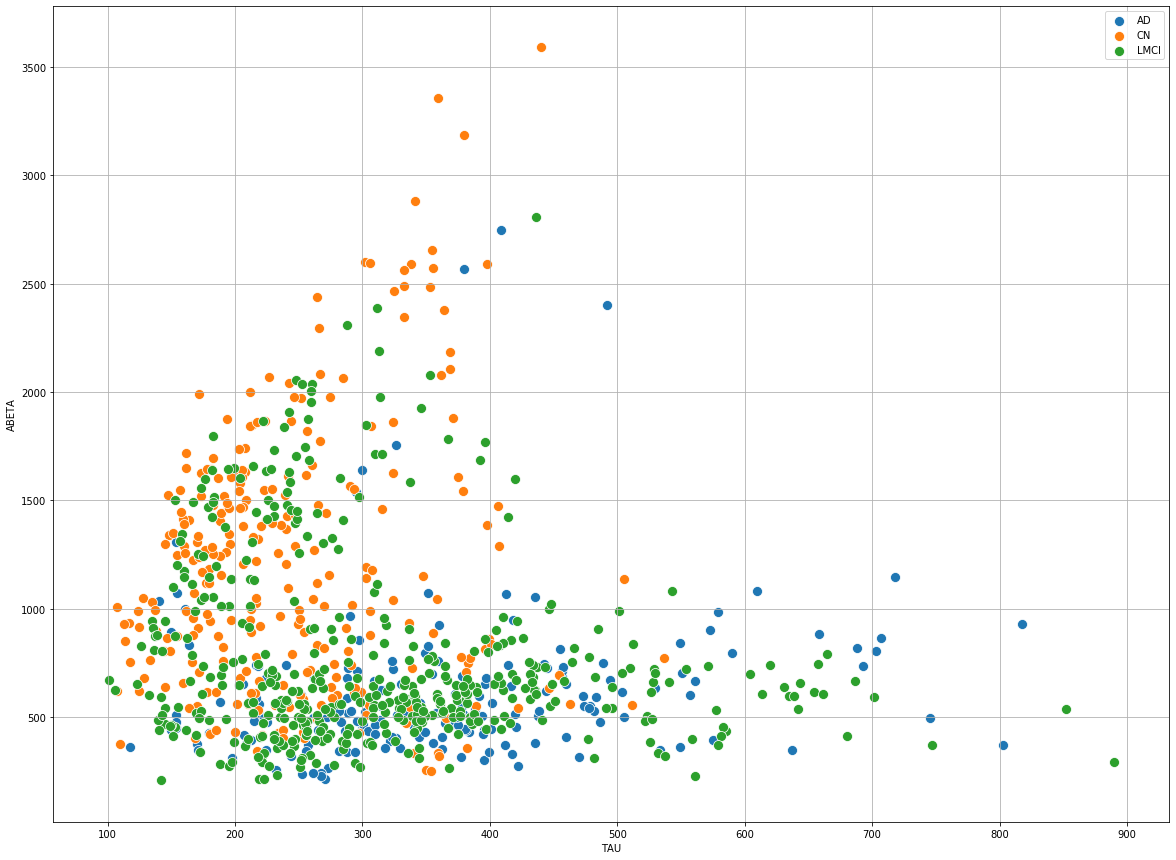

In [174]:
plt.figure(figsize=(20,15))
plt.grid()
for i, dati in ADNI1.groupby('DX_bl'):
    sns.scatterplot(x = 'TAU', y = 'ABETA', s=100, data= dati, label=str(i))
plt.legend()

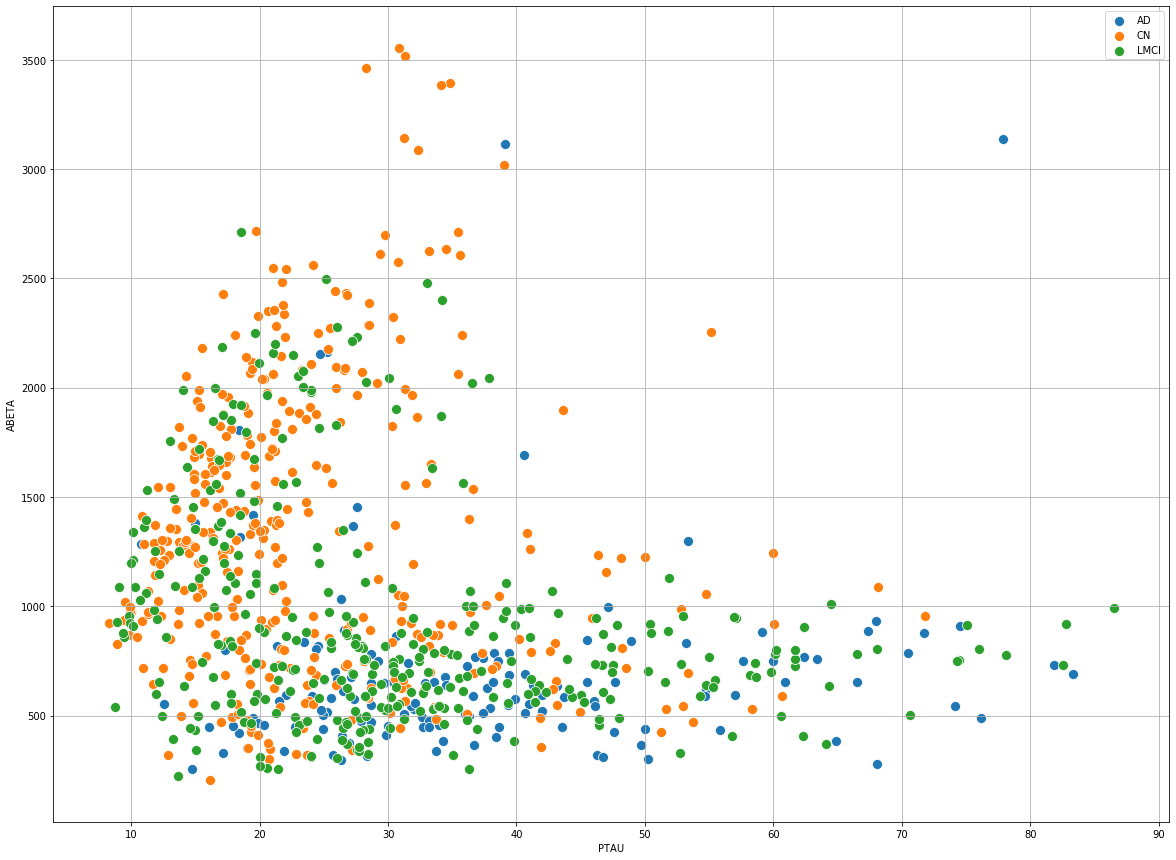

In [175]:
plt.figure(figsize=(20,15))
plt.grid()
for i, dati in ADNITOT.groupby('DX_bl'):
    if str(i) in ['CN', 'LMCI', 'AD']:
        sns.scatterplot(x = 'PTAU', y = 'ABETA', s=100, data= dati, label=str(i))
plt.legend()

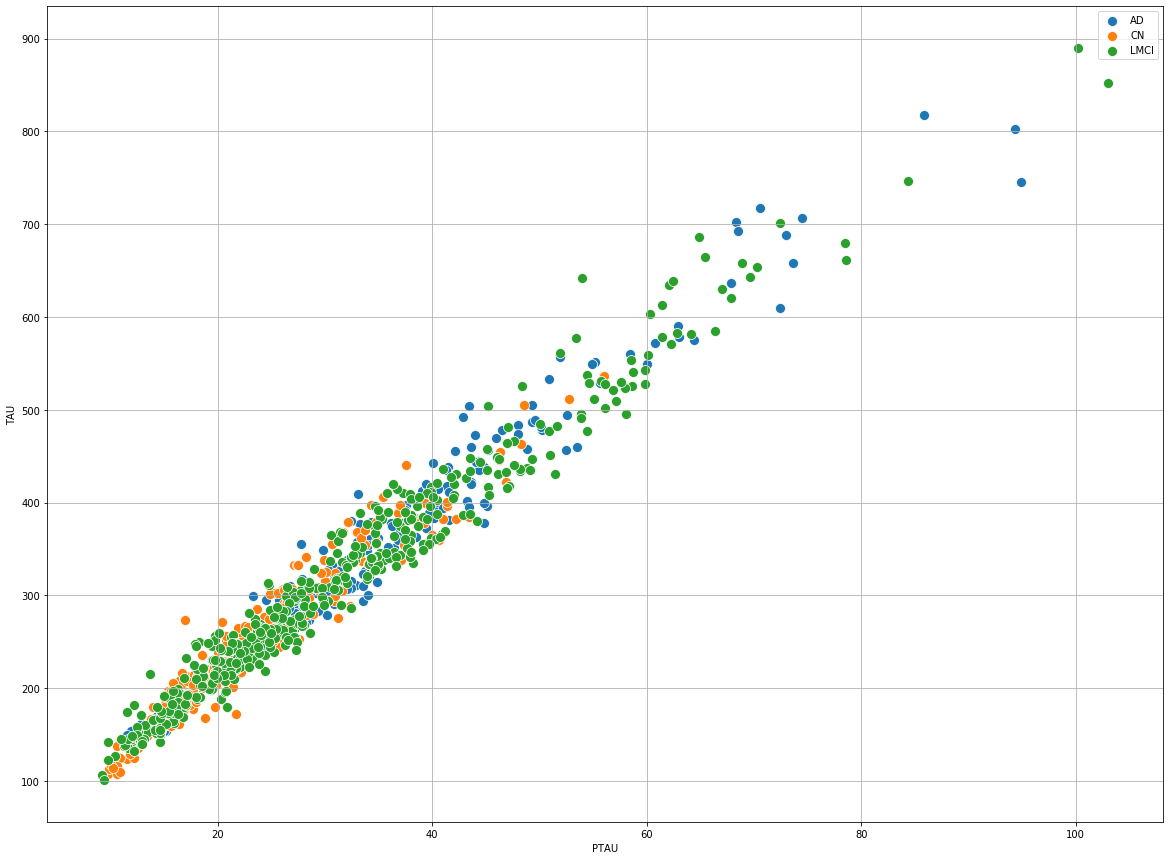

In [176]:
plt.figure(figsize=(20,15))
plt.grid()
for i, dati in ADNI1.groupby('DX_bl'):
    sns.scatterplot(x = 'PTAU', y = 'TAU', s=100, data= dati, label=str(i))
plt.legend()

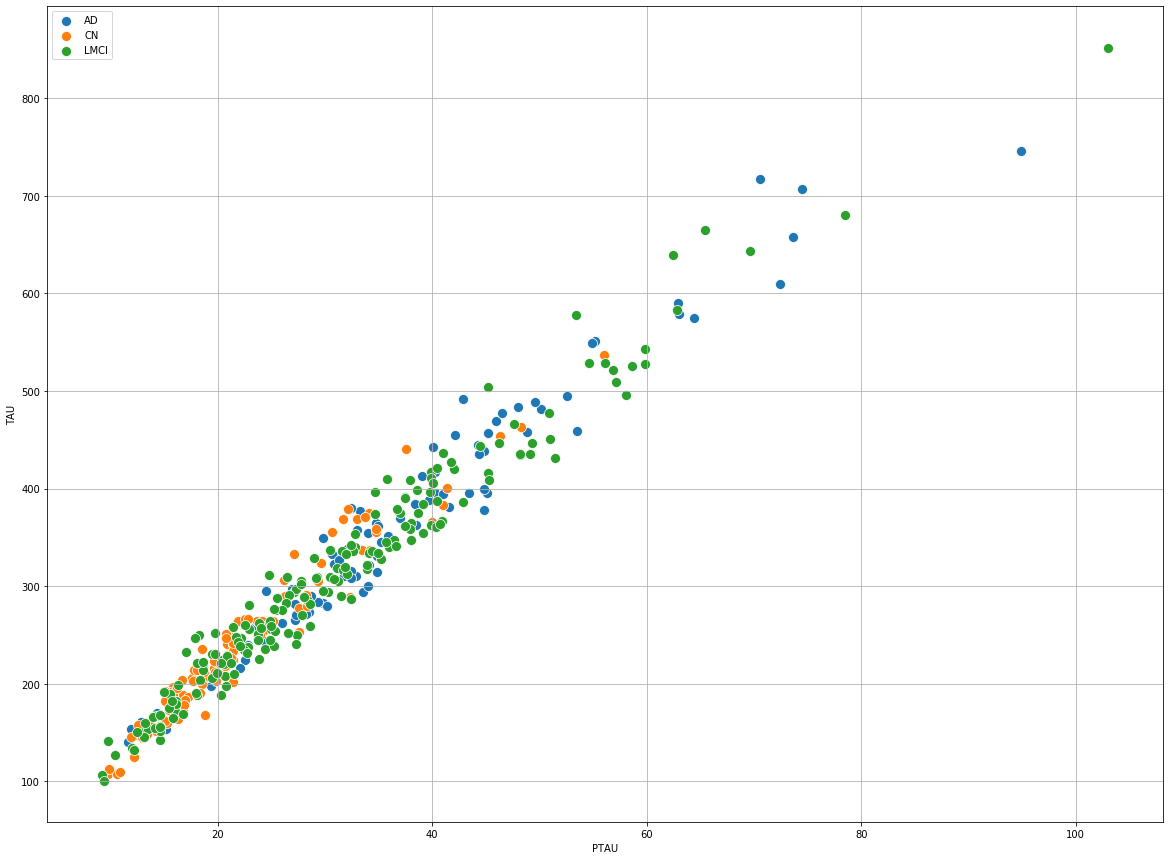

In [29]:
plt.figure(figsize=(20,15))
plt.grid()
for i, dati in ADNI1.groupby('DX_bl'):
    sns.scatterplot(x = 'PTAU', y = 'TAU', s=100, data= dati, label=str(i))
plt.legend()

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

ADNI_train = ADNI1[['ABETA', 'TAU', 'PTAU']]

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(ADNI_train, ADNI1['DX_bl'], test_size=0.3, random_state=42)

In [76]:


# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=150, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
# Actual class predictions
rf_predictions = model.predict(xtest)
# Probabilities for each class
rf_probs = model.predict_proba(xtest)[:, 1]

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(rf_predictions, ytest)

array([[17,  4, 26],
       [ 4, 29, 24],
       [37, 41, 91]])

In [80]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [81]:
accuracy_score(rf_predictions, ytest)

0.5018315018315018